In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [20]:
path="/content/drive/MyDrive/TCC/dados/anualizados/csv/"

anos = [str(i) for i in range(1991, 2020)]
meses = ["{:02d}".format(i) for i in range(1,13)] # colocamos os 0 a esquerda se precisar
anomes =  ["199012"] 
n_estados = 27

for ano in anos:
  anomes += [str(ano) + i for i in meses]

estados = ['Acre', 'Alagoas', 'Amazonas', 'Amapá', 'Bahia', 'Ceará',
  'Distrito Federal', 'Espírito Santo', 'Goiás', 'Maranhão',
  'Minas Gerais', 'Mato Grosso do Sul', 'Mato Grosso', 'Pará', 'Paraíba',
  'Pernambuco', 'Piauí', 'Paraná', 'Rio de Janeiro',
  'Rio Grande do Norte', 'Rondônia', 'Roraima', 'Rio Grande do Sul',
  'Santa Catarina', 'Sergipe', 'São Paulo', 'Tocantins']

norte = [0,2,3,13,20,21]
nordeste = [1,4,5,9,14,15,16,19,24,26]
centro = [6,8,11,12]
sudeste = [7,10,18,25]
sul = [17,22,23]

In [21]:
consumo = pd.read_csv(path+"consumo.csv")
consumo.head()

,Estado,199012,199101,199102,199103,199104,199105,199106,199107,199108,...,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
0,Acre,30474,28949,27791,30140,28668,27004,27447,24565,21995,...,132237,124157,113003,100495,88369,73873,57150,41897,25366,10160
1,Alagoas,309582,305351,306278,301440,291133,280860,276032,271693,265202,...,332593,301952,269615,233210,210711,182750,150372,117790,75087,36503
2,Amazonas,29559,30431,31700,34092,35539,39072,41783,42655,45360,...,103084,96114,88502,80060,71225,59974,48632,35522,22327,12274
3,Amapá,252303,257506,254649,255935,250422,242894,236255,230968,229159,...,454687,420078,379291,339468,299511,247463,193896,147657,96591,44907
4,Bahia,1189274,1175363,1167999,1158184,1148156,1127389,1108500,1100836,1081446,...,2704727,2463115,2210812,1928900,1728687,1458176,1176710,891175,562916,264838


In [22]:
aux = [list(consumo["Estado"])]



# anomes de 19901 ate 201912
for index  in range(1,len(anomes)):
# for index  in range(2):

  mes = [anomes[index]]

  # estados...
  for estado in consumo.index:

    mes += [round(1 - (consumo[anomes[index]][estado]/consumo[anomes[index - 1]][estado]), 2)]

  aux += [mes]

tend = pd.DataFrame(aux)
tend.columns = ["Ano"] + list(tend.iloc[0])[:-1]
tend = tend.iloc[1:]

In [23]:
df = tend.transpose()
df.columns = list(df.iloc[0])
df = df.iloc[1:]
df.head()

,199101,199102,199103,199104,199105,199106,199107,199108,199109,199110,...,201903,201904,201905,201906,201907,201908,201909,201910,201911,201912
Acre,0.05,0.04,-0.08,0.05,0.06,-0.02,0.11,0.1,0.04,0.05,...,0.07,0.06,0.09,0.11,0.12,0.16,0.23,0.27,0.39,0.6
Alagoas,0.01,-0.0,0.02,0.03,0.04,0.02,0.02,0.02,0.02,0.01,...,0.08,0.09,0.11,0.14,0.1,0.13,0.18,0.22,0.36,0.51
Amazonas,-0.03,-0.04,-0.08,-0.04,-0.1,-0.07,-0.02,-0.06,-0.04,-0.04,...,0.07,0.07,0.08,0.1,0.11,0.16,0.19,0.27,0.37,0.45
Amapá,-0.02,0.01,-0.01,0.02,0.03,0.03,0.02,0.01,0.03,0.02,...,0.07,0.08,0.1,0.1,0.12,0.17,0.22,0.24,0.35,0.54
Bahia,0.01,0.01,0.01,0.01,0.02,0.02,0.01,0.02,0.02,0.02,...,0.08,0.09,0.1,0.13,0.1,0.16,0.19,0.24,0.37,0.53


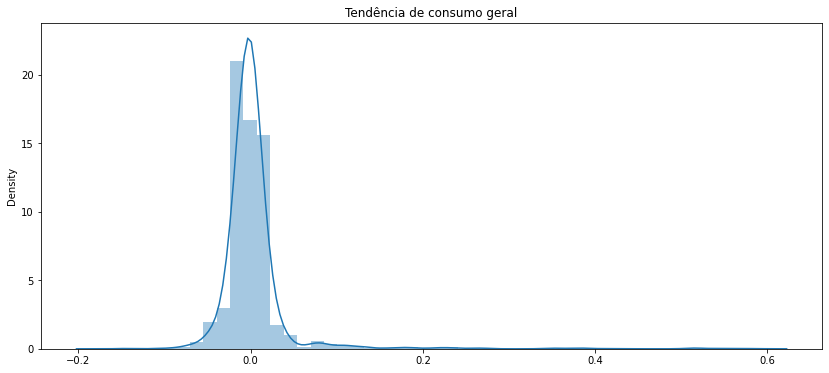

In [24]:
plt.figure(figsize=(14,6))

plt.title("Tendência de consumo geral")

sns.distplot(df)

plt.show()

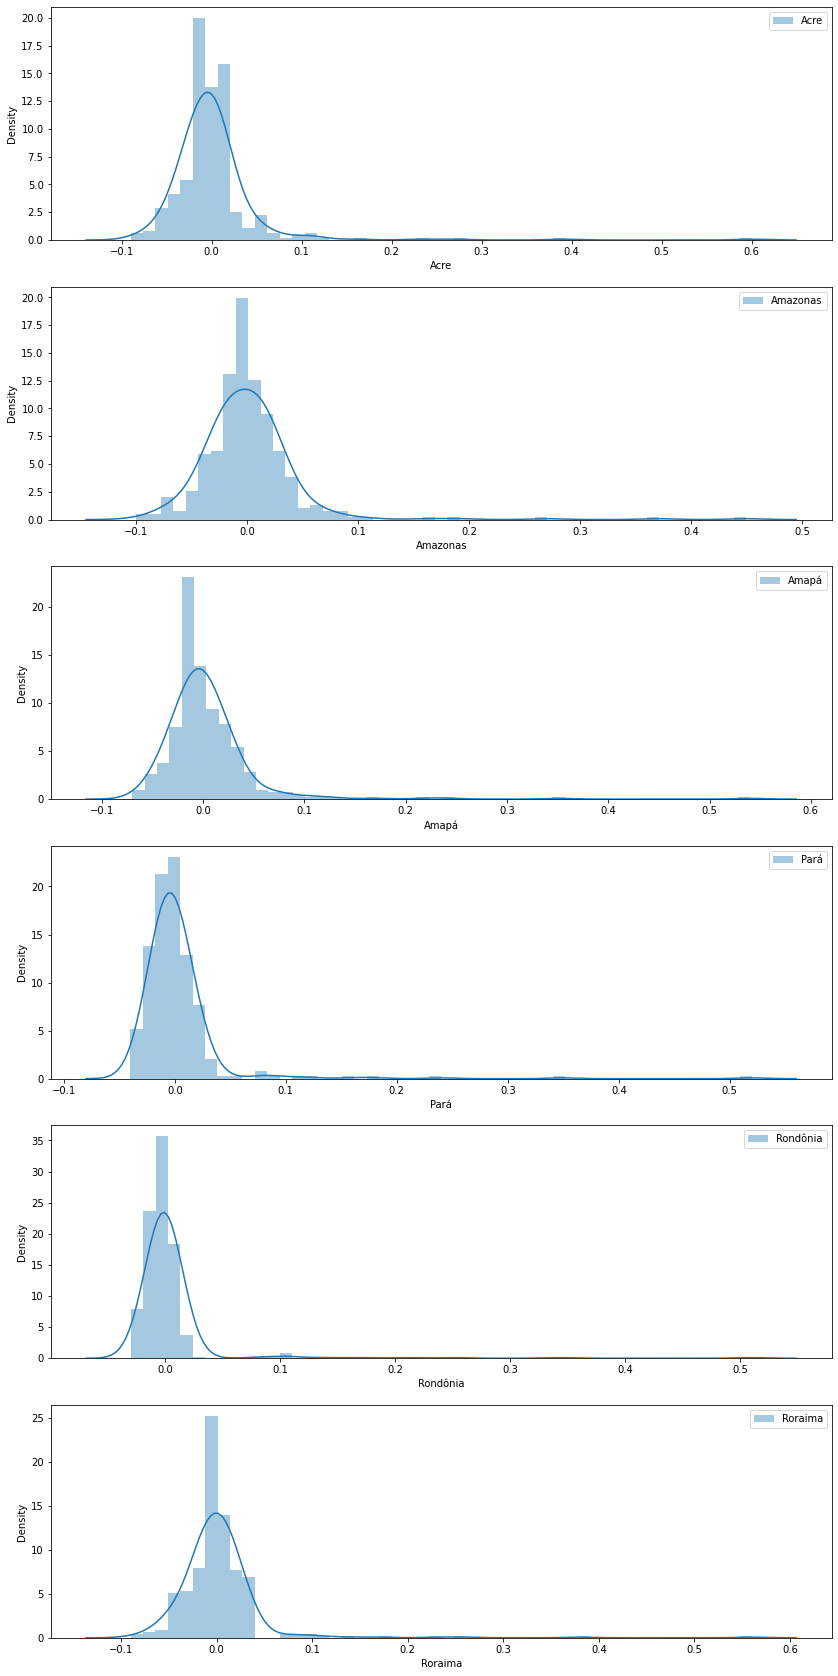

In [35]:
plt.figure(figsize=(14,30))

plt.title("Tendência de consumo no norte")

sns.color_palette("Set2")

for i in range(len(norte)):

  
  plt.subplot(len(norte),1,i+1)

  sns.distplot(df.iloc[norte[i]], label=estados[norte[i]])

  plt.legend()

plt.show()

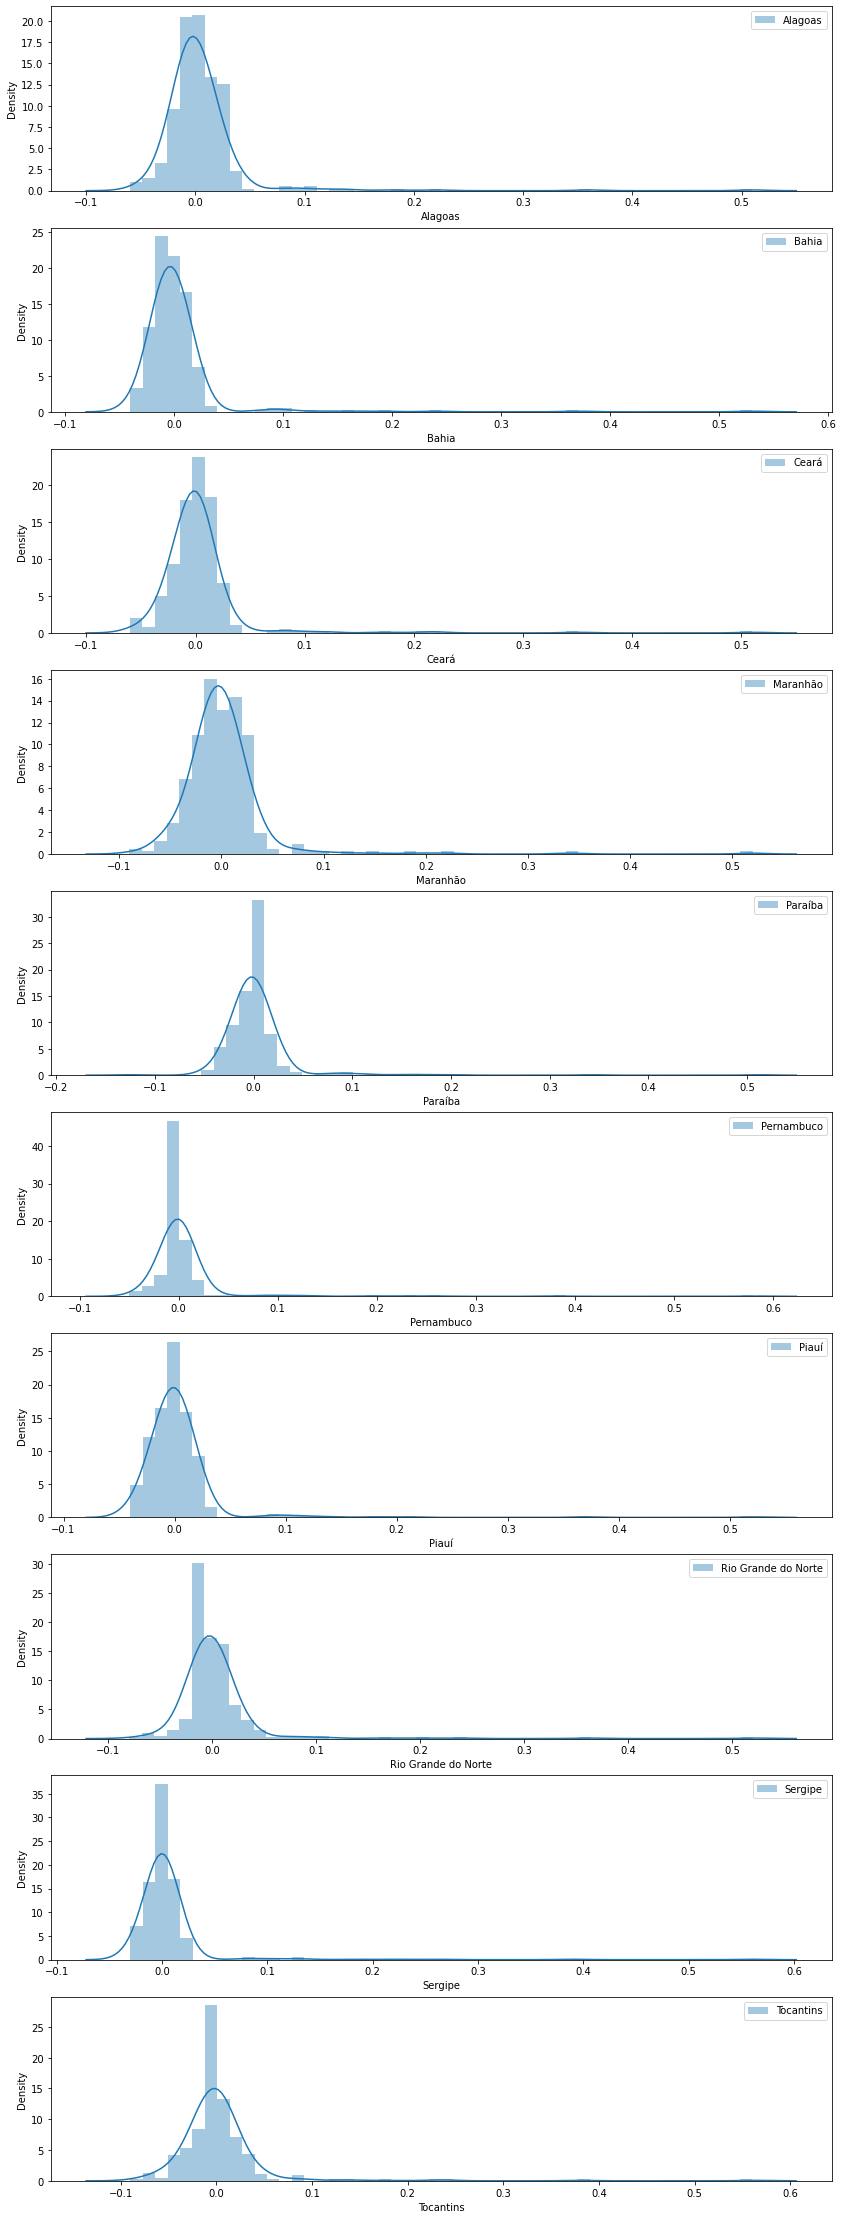

In [34]:
plt.figure(figsize=(14,40))

plt.title("Tendência de consumo no nordeste")

sns.color_palette("Set2")

for i in range(len(nordeste)):

  
  plt.subplot(len(nordeste),1,i+1)

  sns.distplot(df.iloc[nordeste[i]], label=estados[nordeste[i]])

  plt.legend()

plt.show()

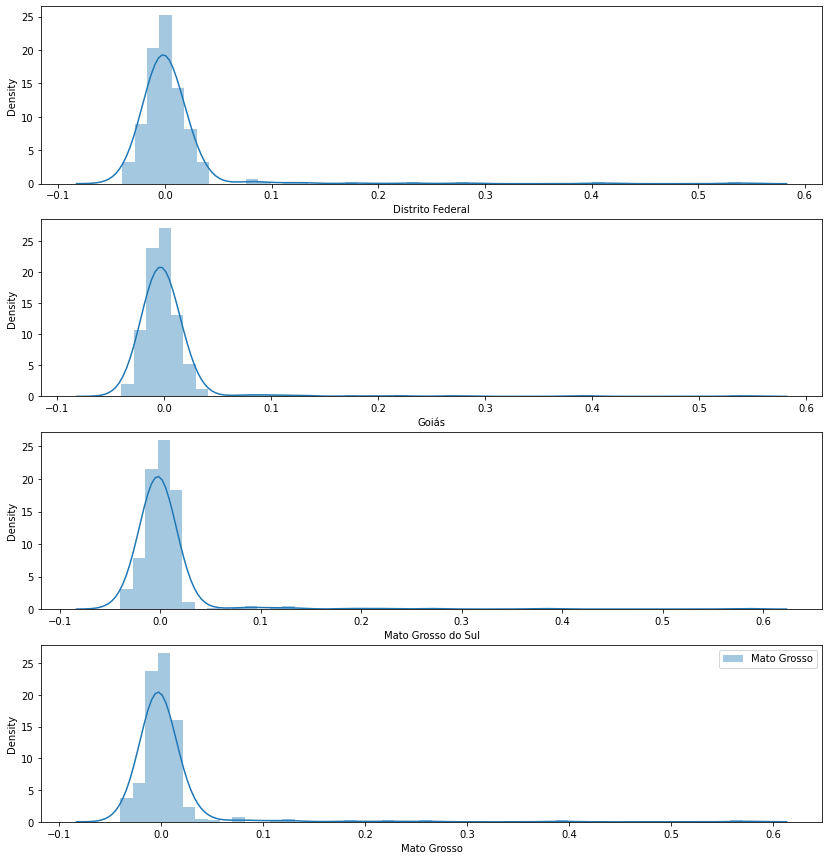

In [38]:
plt.figure(figsize=(14,15))

plt.title("Tendência de consumo no centro-oeste")

sns.color_palette("Set2")

for i in range(len(centro)):

  
  plt.subplot(len(centro),1,i+1)

  sns.distplot(df.iloc[centro[i]], label=estados[centro[i]])

plt.legend()

plt.show()

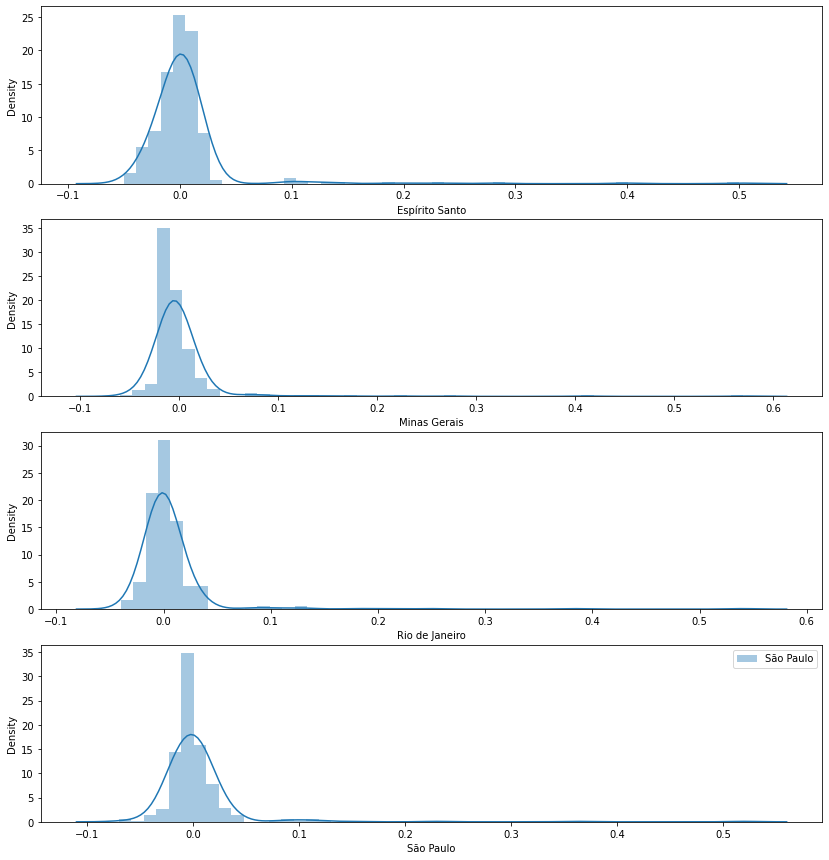

In [40]:
plt.figure(figsize=(14,15))

plt.title("Tendência de consumo no sudeste")

sns.color_palette("Set2")

for i in range(len(sudeste)):

  
  plt.subplot(len(sudeste),1,i+1)

  sns.distplot(df.iloc[sudeste[i]], label=estados[sudeste[i]])

plt.legend()

plt.show()

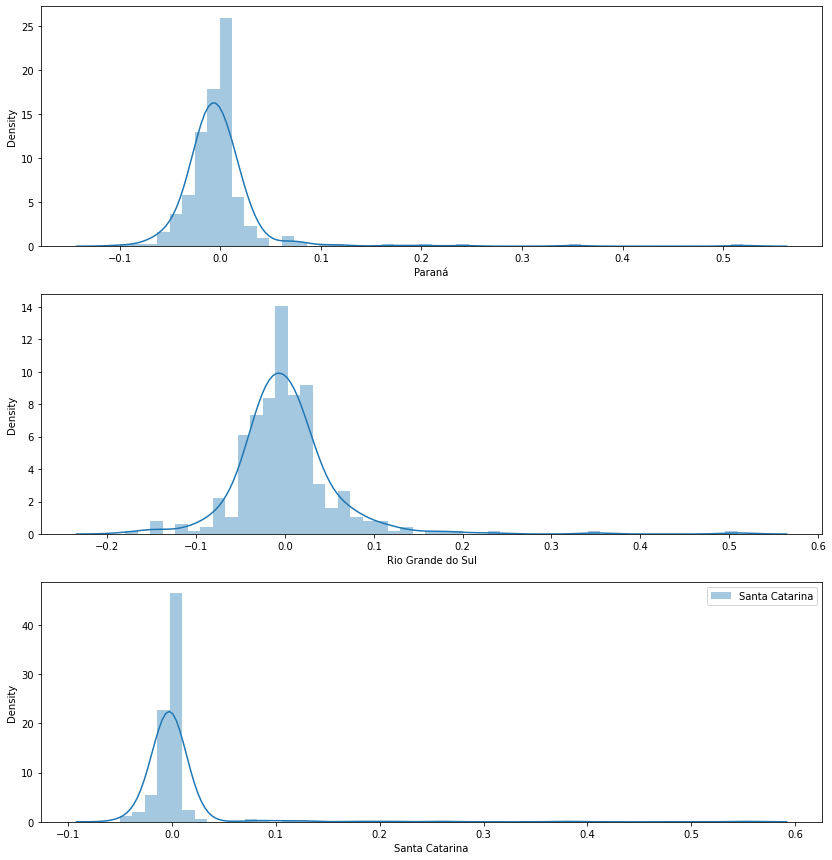

In [42]:
plt.figure(figsize=(14,15))

plt.title("Tendência de consumo no sul")

sns.color_palette("Set2")

for i in range(len(sul)):

  
  plt.subplot(len(sul),1,i+1)

  sns.distplot(df.iloc[sul[i]], label=estados[sul[i]])

plt.legend()

plt.show()